# Introdução a Pandas

In [ ]:
# Importação das bibliotecas
import pandas as pd

In [ ]:
# Ler arquivo csv
dfSales = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/vgsales_alt.csv')
# Exibir as 3 primeiras linhas
dfSales.head(3)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales
0,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.0,0.00,0.29
1,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.00,0.0,0.03,0.03
2,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.00,0.0,0.01,0.01


In [ ]:
# Retorna os nomes das colunas
dfSales.columns

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Global_Sales'],
      dtype='object')

### Seleção de colunas

In [ ]:
colunas = [ 'Platform', 'Publisher' ] 
dfSales[ colunas ]        # Requer uma lista de colunas

,Platform,Publisher
0,DS,Ubisoft
1,PS4,Sega
2,PSV,Idea Factory
3,PSV,Sega
4,PSV,D3Publisher
...,...,...
16593,GC,Unknown
16594,PC,Namco Bandai Games
16595,PS3,Unknown
16596,GC,Unknown


## Fatiamento

In [ ]:
#iloc[ linhas, colunas ]
dfFatiado = dfSales.iloc[ 0:6, : ]
dfFatiado

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales
0,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.00,0.00,0.29
1,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.00,0.00,0.03,0.03
2,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.00,0.00,0.01,0.01
3,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.00,0.00,0.01,0.01
4,Hyakka Hyakurou: Sengoku Ninpoujou,PSV,2016.0,Adventure,D3Publisher,0.00,0.00,0.02,0.02
5,Lego Star Wars: The Force Awakens,PS4,2016.0,Action,Warner Bros. Interactive Entertainment,0.14,0.32,0.00,0.54


## Filtros

In [ ]:
# Lista de booleanos dentro do dataframe => filtra. Obs: A lista deve ter o mesmo tamanho.
dfFatiado[ [True, False, False, False, True, True] ]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales
0,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.00,0.00,0.29
4,Hyakka Hyakurou: Sengoku Ninpoujou,PSV,2016.0,Adventure,D3Publisher,0.00,0.00,0.02,0.02
5,Lego Star Wars: The Force Awakens,PS4,2016.0,Action,Warner Bros. Interactive Entertainment,0.14,0.32,0.00,0.54


In [ ]:
dfFatiado.Year >= 2017

0     True
1     True
2     True
3     True
4    False
5    False
Name: Year, dtype: bool

In [ ]:
dfFiltrado = dfSales[ (dfSales['Platform'] == 'PS4') & (dfSales['Year'] > 2015) ]   # & => and da operação bit a bit
dfFiltrado

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales
1,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.00,0.00,0.03,0.03
5,Lego Star Wars: The Force Awakens,PS4,2016.0,Action,Warner Bros. Interactive Entertainment,0.14,0.32,0.00,0.54
6,The King of Fighters XIV,PS4,2016.0,Fighting,Deep Silver,0.04,0.01,0.03,0.09
7,Gundam Breaker 3,PS4,2016.0,Action,Namco Bandai Games,0.00,0.00,0.09,0.09
12,NASCAR Heat Evolution,PS4,2016.0,Racing,Dusenberry Martin Racing,0.03,0.00,0.00,0.03
...,...,...,...,...,...,...,...,...,...
338,Touhou Genso Rondo: Bullet Ballet,PS4,2016.0,Shooter,Nippon Ichi Software,0.01,0.00,0.00,0.02
341,Madden NFL 17,PS4,2016.0,Sports,Electronic Arts,0.92,0.08,0.00,1.23
345,Koihime Enbu,PS4,2016.0,Fighting,Yeti,0.00,0.00,0.02,0.02
346,Homefront: The Revolution,PS4,2016.0,Shooter,Deep Silver,0.05,0.19,0.03,0.31


In [ ]:
dfSales.query('Platform == "PS4" and Year < 2015')

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales
968,Rabbids Invasion: The Interactive TV Show,PS4,2014.0,Misc,Ubisoft,0.00,0.01,0.00,0.02
988,Assassin's Creed: Unity,PS4,2014.0,Action,Ubisoft,1.18,1.96,0.08,3.92
1005,Warriors Orochi 3,PS4,2014.0,Action,Tecmo Koei,0.04,0.05,0.04,0.15
1023,Minecraft,PS4,2014.0,Misc,Sony Computer Entertainment Europe,1.38,1.87,0.12,4.02
1035,Yakuza: Ishin,PS4,2014.0,Action,Sega,0.00,0.00,0.15,0.15
...,...,...,...,...,...,...,...,...,...
1978,Knack,PS4,2013.0,Platform,Sony Computer Entertainment Europe,0.43,0.67,0.42,1.67
2030,LEGO Marvel Super Heroes,PS4,2013.0,Action,Warner Bros. Interactive Entertainment,0.59,0.75,0.01,1.56
2034,Just Dance 2014,PS4,2013.0,Misc,Ubisoft,0.18,0.16,0.00,0.39
2039,Madden NFL 25,PS4,2013.0,Sports,Electronic Arts,0.62,0.13,0.00,0.82


# Análise Descritiva

In [ ]:
dfSales.shape

(16598, 9)

In [ ]:
dfSales.head(9)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales
0,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.00,0.00,0.29
1,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.00,0.00,0.03,0.03
2,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.00,0.00,0.01,0.01
3,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.00,0.00,0.01,0.01
4,Hyakka Hyakurou: Sengoku Ninpoujou,PSV,2016.0,Adventure,D3Publisher,0.00,0.00,0.02,0.02
5,Lego Star Wars: The Force Awakens,PS4,2016.0,Action,Warner Bros. Interactive Entertainment,0.14,0.32,0.00,0.54
6,The King of Fighters XIV,PS4,2016.0,Fighting,Deep Silver,0.04,0.01,0.03,0.09
7,Gundam Breaker 3,PS4,2016.0,Action,Namco Bandai Games,0.00,0.00,0.09,0.09
8,Taiko no Tatsujin: Don Don! Mystery Adventure,3DS,2016.0,Action,Namco Bandai Games,0.00,0.00,0.09,0.09


In [ ]:
totalGlobal = dfSales['Global_Sales'].sum()
print( 'Total de Vendas Globais: ', totalGlobal )

Total de Vendas Globais:  8920.440000000002


In [ ]:
dfSales['Global_Sales'].mean()

0.537440655500683

In [ ]:
dfSales['Global_Sales'].median()

0.17

In [ ]:
dfSales[ ['NA_Sales', 'Global_Sales'] ].sum()

NA_Sales        4392.95
Global_Sales    8920.44
dtype: float64

In [ ]:
dfSales[ ['NA_Sales', 'Global_Sales'] ].describe()

,NA_Sales,Global_Sales
count,16598.000000,16598.000000
mean,0.264667,0.537441
std,0.816683,1.555028
min,0.000000,0.010000
25%,0.000000,0.060000
50%,0.080000,0.170000
75%,0.240000,0.470000
max,41.490000,82.740000


In [ ]:
dfSales['Genre'].unique()

array(['Simulation', 'Role-Playing', 'Action', 'Adventure', 'Fighting',
       'Racing', 'Shooter', 'Sports', 'Misc', 'Strategy', 'Platform',
       'Puzzle'], dtype=object)

In [ ]:
dfSales['Publisher'].nunique()  # Quantidade única 

578

In [ ]:
dfSales.Global_Sales.nlargest(10)

10199    82.74
16197    40.24
7972     35.82
5909     33.00
15578    31.37
16124    30.26
9956     30.01
9863     29.02
5919     28.62
16213    28.31
Name: Global_Sales, dtype: float64

In [ ]:
# Ordenação
dfSales.sort_values(by=['Global_Sales'], ascending=False).head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales
10199,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,82.74
16197,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,40.24
7972,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,35.82
5909,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,33.00
15578,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,31.37


In [ ]:
# Agrupamento
dfGenreGlobal = dfSales[ ['Genre', 'Global_Sales'] ]
dfGenreGlobal.head()

,Genre,Global_Sales
0,Simulation,0.29
1,Role-Playing,0.03
2,Action,0.01
3,Role-Playing,0.01
4,Adventure,0.02


In [ ]:
dfGenreGlobalSum = dfGenreGlobal.groupby( by=['Genre'] ).sum()
dfGenreGlobalSum

,Global_Sales
Genre,
Action,1751.18
Adventure,239.04
Fighting,448.91
Misc,809.96
Platform,831.37
Puzzle,244.95
Racing,732.04
Role-Playing,927.37
Shooter,1037.37


In [ ]:
dfGenreGlobalMean = dfGenreGlobal.groupby( by=['Genre'] ).mean()
dfGenreGlobalMean

,Global_Sales
Genre,
Action,0.528100
Adventure,0.185879
Fighting,0.529375
Misc,0.465762
Platform,0.938341
Puzzle,0.420876
Racing,0.586101
Role-Playing,0.623233
Shooter,0.791885


In [ ]:
dfTopGenreSum = dfGenreGlobalSum.sort_values( by=['Global_Sales'], ascending=False).head()
dfTopGenreSum

,Global_Sales
Genre,
Action,1751.18
Sports,1330.93
Shooter,1037.37
Role-Playing,927.37
Platform,831.37


In [ ]:
dfSales.Genre.value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

## Gráficos

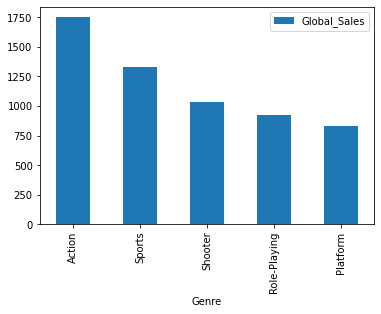

In [ ]:
dfTopGenreSum.plot.bar()

In [ ]:
import plotly.express as px